── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

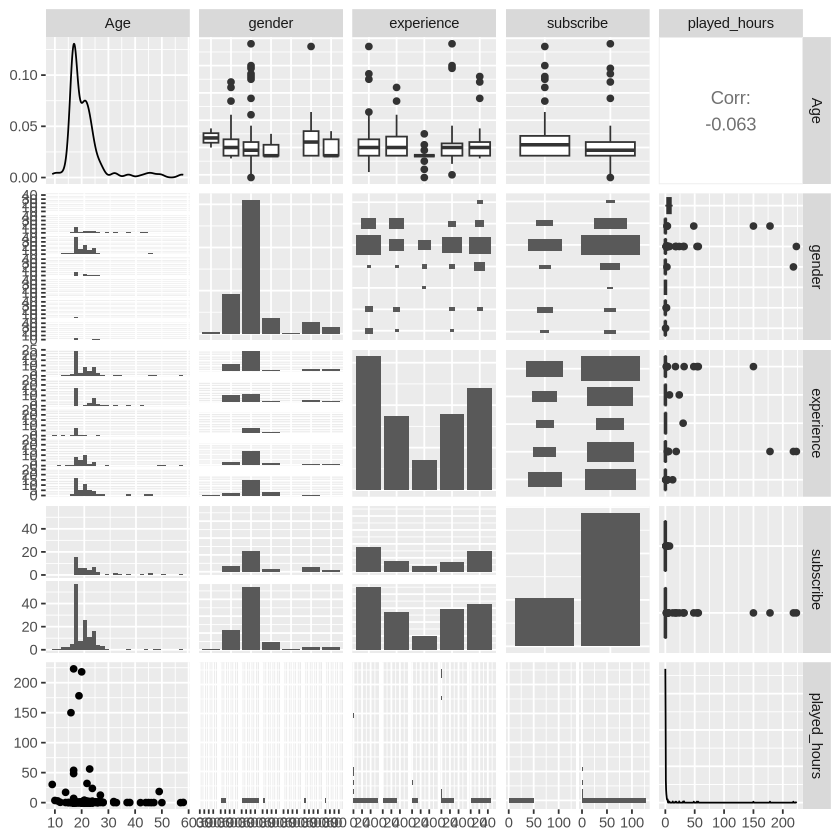

In [1]:
library(tidyverse)
library(tidymodels)
library(GGally)

players_data <- read_csv("players.csv")

players_data %>%
  select(Age, gender, experience, subscribe, played_hours) %>%
  GGally::ggpairs()

In [4]:
exp_n_hours <- players_data %>%
  select(played_hours, experience)

exp_split <- initial_split(exp_n_hours, prop = 0.75, strata = played_hours)
exp_training <- training(exp_split)
exp_testing <- testing(exp_split)

exp_recipe <- recipe(played_hours ~ experience, data = exp_training) %>%
  step_mutate(experience = as.factor(experience)) %>% 
  step_dummy(all_nominal_predictors()) %>%
  step_scale(all_numeric_predictors()) %>%
  step_center(all_numeric_predictors())

exp_recipe

exp_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

exp_spec

exp_vfold <- vfold_cv(exp_training, v = 5, strata = played_hours)

exp_workflow <- workflow() %>%
  add_recipe(exp_recipe) %>%
  add_model(exp_spec)

exp_workflow

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

exp_results <- exp_workflow %>%
  tune_grid(resamples = exp_vfold, grid = gridvals) %>%
  collect_metrics()

exp_results



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Variable mutation for: as.factor(experience)

• Dummy variables from: all_nominal_predictors()

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_mutate()
• step_dummy()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


→ A | warning: A correlation computation is required, but `estimate` is constant and has 0
               standard deviation, resulting in a divide by 0 error. `NA` will be returned.

There were issues with some computations   A: x1

There were issues with some computations   A: x4





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,28.564159626,5,8.354712746,Preprocessor1_Model01
1,rsq,standard,0.012033076,1,NA,Preprocessor1_Model01
6,rmse,standard,28.561104969,5,8.357451098,Preprocessor1_Model02
6,rsq,standard,0.003556471,5,0.002278365,Preprocessor1_Model02
11,rmse,standard,28.567586227,5,8.351743478,Preprocessor1_Model03
11,rsq,standard,0.004548802,5,0.002324425,Preprocessor1_Model03
16,rmse,standard,29.025217521,5,7.505447195,Preprocessor1_Model04
16,rsq,standard,0.027801433,5,0.016417499,Preprocessor1_Model04
21,rmse,standard,30.527434098,5,5.722453970,Preprocessor1_Model05
